# **Spam detection - Dario Simone - VR512966**

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a dataframe of the file emails.csv
df = pd.read_csv("drive/MyDrive/Colab Notebooks/NLP-Assignment1/emails.csv")

print("Total samples: " + str(df.shape[0]))
print("Total features: " + str(df.shape[1]))

Total samples: 5172
Total features: 3002


In [98]:
# Check if 'provenance' exists as a feature
for i in df.keys():
  if i == 'provenance':
    print("TRUE")

# Drop 'email' column
df.drop(['Email No.'], axis=1, inplace=True)

*Prepare data for NLTK Naive Bayes classifier*

*I use NLTK at the beginning to understand which are the most informative features*


In [99]:
# Split of the dataset
data_train = df.sample(frac=0.75, random_state=42)
data_test = df.drop(data_train.index)

# For each sample create a dictionary in which the keys are the features and the values are the values of the feature related to the sample.
# At the end of the dictionary, there is the label of the sample.

df_train = []  # Initialize an empty list to store final results
for index, sample in data_train.iterrows():
    df_for_classifier = {}  # Dictionary to store features for the classifier

    # Extract all columns and their values for the current row
    for key in data_train.keys():
      if key != 'Prediction':
        df_for_classifier[key] = sample[key]  # Add each key-value pair to the dictionary

    # Extract the prediction value separately
    pred_label = sample['Prediction']

    # Append a tuple of the feature dictionary and prediction dictionary to the final list
    df_train.append((df_for_classifier, pred_label))

# Repeat for the test part
df_test = []
for index, sample in data_test.iterrows():
    df_for_classifier = {}
    for key in data_test.keys():
      if key != 'Prediction':
        df_for_classifier[key] = sample[key]
    pred_label = sample['Prediction']
    df_test.append((df_for_classifier, pred_label))

*Define the Naive Bayes classifier, train the model and test it*

In [100]:
import nltk
nbc = nltk.NaiveBayesClassifier.train(df_train)
nbc_predict = nltk.classify.accuracy(nbc, df_test)

In [101]:
print("Classifier accuracy percent: ",(nbc_predict)*100)
print(nbc.show_most_informative_features())

Classifier accuracy percent:  84.91879350348029
Most Informative Features
               forwarded = 1                   0 : 1      =    136.0 : 1.0
            prescription = 1                   1 : 0      =     91.1 : 1.0
                     biz = 1                   1 : 0      =     77.7 : 1.0
                    spam = 1                   1 : 0      =     74.4 : 1.0
                  weight = 1                   1 : 0      =     69.3 : 1.0
                   sleep = 1                   1 : 0      =     56.0 : 1.0
                   cheap = 1                   1 : 0      =     53.6 : 1.0
             legislation = 1                   1 : 0      =     52.7 : 1.0
            solicitation = 1                   1 : 0      =     51.0 : 1.0
                featured = 1                   1 : 0      =     51.0 : 1.0
None


*From the results it is clear that the word 'forwarded' and 'prescription' are the most relevants. The value on the right mean that when that word appears in the text, it is 136 times more likely to belong to Class 0 (non-spam) than Class 1 (spam).*

***SCIKITLEARN***

*Now i use scikit-learn to evalutate the classifier and print metrics like f1-score and recall.*

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


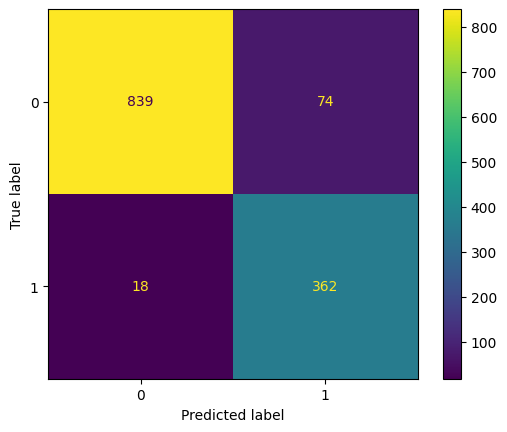

In [102]:
# Get features and labels dataframes
X = df.iloc[:, df.columns != "Prediction"]
y = df.iloc[:, df.columns == "Prediction"]

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the model, train and test it
from sklearn.naive_bayes import GaussianNB
nbc_sk = GaussianNB()
nbc_sk.fit(X_train, y_train)
y_pred = nbc_sk.predict(X_test)

# Get the evalution metrics
from sklearn.metrics import precision_recall_fscore_support
_, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Get the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay.from_estimator(nbc_sk, X_test, y_test)

***Remove stop words***

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TOTAL WORDS WITH STOP WORDS: 3001
TOTAL WORDS WITHOUT STOP WORDS: 2867


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


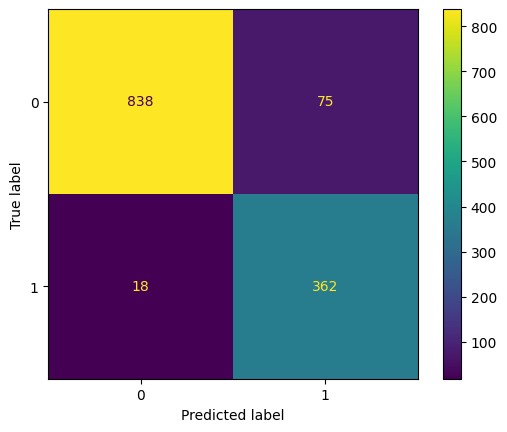

In [103]:
import nltk
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

words_features = df.keys()
new_filtered_words = [
    word for word in words_features if word.lower() not in stopwords.words('english')]

print("TOTAL WORDS WITH STOP WORDS: " + str(len(words_features)))
print("TOTAL WORDS WITHOUT STOP WORDS: " + str(len(new_filtered_words)))

feature_to_drop = np.setdiff1d(words_features, new_filtered_words)

# Drop columns of the stop words
df_without_stop_words = df.copy()
for stop_words in feature_to_drop:
  df_without_stop_words.drop([stop_words], axis=1, inplace=True)

# Get features and labels dataframes
X_without_stop_words = df_without_stop_words.iloc[:, df_without_stop_words.columns != "Prediction"]
y_without_stop_words = df_without_stop_words.iloc[:, df_without_stop_words.columns == "Prediction"]

# Scale the features
X_without_stop_words = scaler.fit_transform(X_without_stop_words)

# Retrain without stop words
from sklearn.model_selection import train_test_split
X_train_without_stop_words, X_test_without_stop_words, y_train_without_stop_words, y_test_without_stop_words = train_test_split(X_without_stop_words, y_without_stop_words, test_size=0.25, random_state=42)

from sklearn.naive_bayes import GaussianNB
nbc_sk_without_stop_words = GaussianNB()
nbc_sk_without_stop_words.fit(X_train_without_stop_words, y_train_without_stop_words)
y_pred_without_stop_words = nbc_sk_without_stop_words.predict(X_test_without_stop_words)

from sklearn.metrics import precision_recall_fscore_support
_, recall_without_stop_words, fscore_without_stop_words, _ = precision_recall_fscore_support(y_test_without_stop_words, y_pred_without_stop_words, average='macro')

from sklearn.metrics import ConfusionMatrixDisplay
cm_without_stop_words = ConfusionMatrixDisplay.from_estimator(nbc_sk_without_stop_words, X_test_without_stop_words, y_test_without_stop_words)

**Clustering:**
*to deal with the 'provenance', implement a clustering to understand if some emails belong to the same SMPT Sender*

In [104]:
# Elbow Method: to understand how many clusters we have to use
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score

# Create an array of inertia values for different K values
inertias = [] # Inertia is the sum of the squared distances from each point to its assigned cluster center.
best_k = []
sil_score = 0
max_k = 30
for k in range(2, max_k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_without_stop_words)
    inertias.append(kmeans.inertia_)
    sil_score = silhouette_score(X_without_stop_words, kmeans.fit_predict(X_without_stop_words))
    best_k.append(sil_score)

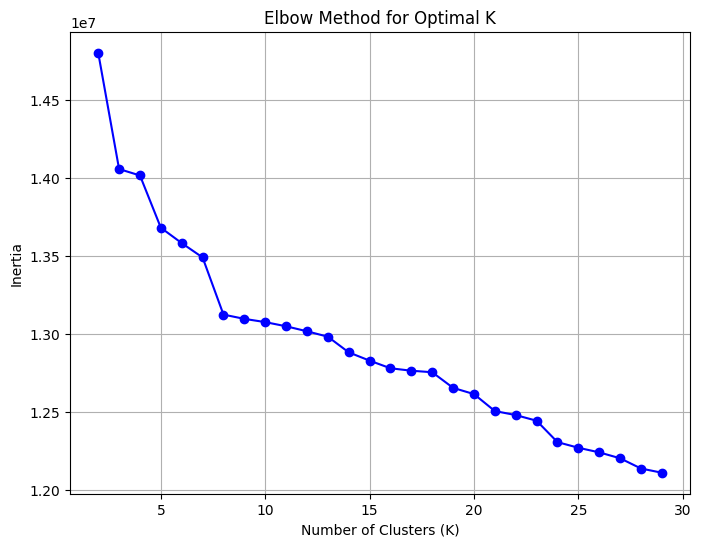

OPTIMAL NUMBER OF CLUSTERS: 2


In [105]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(2, max_k), inertias, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

deltas = np.diff(inertias) # Calculate the differences between consecutive values in the 'inertias' array
k_optimal = np.where(deltas < 0.5 * deltas.max())[0][0] + 2
print("OPTIMAL NUMBER OF CLUSTERS: " + str(k_optimal))

*Now cluster with cosine similarity*



In [106]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

# Compute the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(X_without_stop_words)

# Perform Agglomerative Clustering based on the similarity
# Convert cosine similarity to a distance matrix (1 - similarity)
distance_matrix = 1 - cosine_sim_matrix

# Apply Agglomerative Clustering
clustering_model = AgglomerativeClustering(metric='precomputed', linkage='average', n_clusters=k_optimal)
clusters = clustering_model.fit_predict(distance_matrix)

In [107]:
# Add the cluster labels to the DataFrame
df_with_cluster = df_without_stop_words.copy()
df_with_cluster['Cluster'] = clusters
print("Clustered DataFrame:")
print(df_with_cluster.head(5))
print(df_with_cluster.shape)

Clustered DataFrame:
   ect  hou  enron  com  gas  deal  meter  hpl  please    e  ...  jay  valued  \
0    1    0      0    0    0     0      0    0       0    4  ...    0       0   
1   24   27      1    3    1     0      0    0       2  141  ...    0       0   
2    1    0      0    0    2     0      0    0       0    3  ...    0       0   
3   22   10      0    0    0     2      1    0       0   79  ...    0       0   
4   17    9      0    0    2     0      3    0       1   71  ...    0       0   

   lay  infrastructure  military  allowing  ff  dry  Prediction  Cluster  
0    0               0         0         0   0    0           0        0  
1    0               0         0         0   1    0           0        1  
2    0               0         0         0   0    0           0        0  
3    0               0         0         0   0    0           0        0  
4    0               0         0         0   1    0           0        0  

[5 rows x 2868 columns]
(5172, 2868)


*Re-train the model using clusters as feature*

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


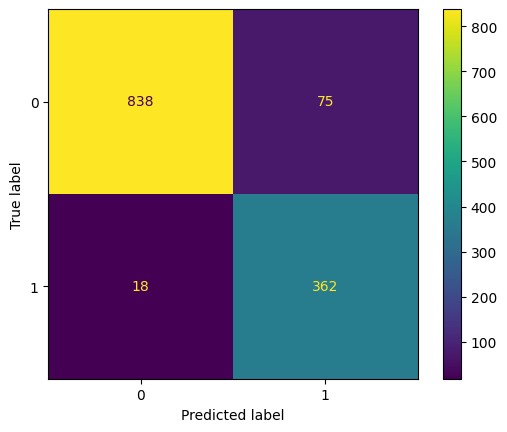

In [108]:
# Retrain with Clusters as feature
X_with_cluster = df_with_cluster.iloc[:, df_with_cluster.columns != "Prediction"]
y_with_cluster = df_with_cluster.iloc[:, df_with_cluster.columns == "Prediction"]

X_with_cluster = scaler.fit_transform(X_with_cluster)

from sklearn.model_selection import train_test_split
X_train_with_cluster, X_test_with_cluster, y_train_with_cluster, y_test_with_cluster = train_test_split(X_with_cluster, y_with_cluster, test_size=0.25, random_state=42)

from sklearn.naive_bayes import GaussianNB
nbc_sk_with_cluster = GaussianNB()
nbc_sk_with_cluster.fit(X_train_with_cluster, y_train_with_cluster)
y_pred_with_cluster = nbc_sk_with_cluster.predict(X_test_with_cluster)

from sklearn.metrics import precision_recall_fscore_support
_, recall_with_cluster, fscore_with_cluster, _ = precision_recall_fscore_support(y_test_with_cluster, y_pred_with_cluster, average='macro')

from sklearn.metrics import ConfusionMatrixDisplay
cm_with_cluster = ConfusionMatrixDisplay.from_estimator(nbc_sk_with_cluster, X_test_with_cluster, y_test_with_cluster)

**Compare the results**

In [109]:
from sklearn.metrics import classification_report
print("RESULTS - WITH STOP WORDS")
print(classification_report(y_test, y_pred))
print("\n ------------- \n")
print("RESULTS - WITHOUT STOP WORDS")
print(classification_report(y_test_without_stop_words, y_pred_without_stop_words))
print("\n ------------- \n")
print("RESULTS - CLUSTERING")
print(classification_report(y_test_with_cluster, y_pred_with_cluster))

RESULTS - WITH STOP WORDS
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       913
           1       0.83      0.95      0.89       380

    accuracy                           0.93      1293
   macro avg       0.90      0.94      0.92      1293
weighted avg       0.94      0.93      0.93      1293


 ------------- 

RESULTS - WITHOUT STOP WORDS
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       913
           1       0.83      0.95      0.89       380

    accuracy                           0.93      1293
   macro avg       0.90      0.94      0.92      1293
weighted avg       0.93      0.93      0.93      1293


 ------------- 

RESULTS - CLUSTERING
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       913
           1       0.83      0.95      0.89       380

    accuracy                           0.93      1293
   macro avg    

CONFUSION MATRIX - WITH STOP WORDS


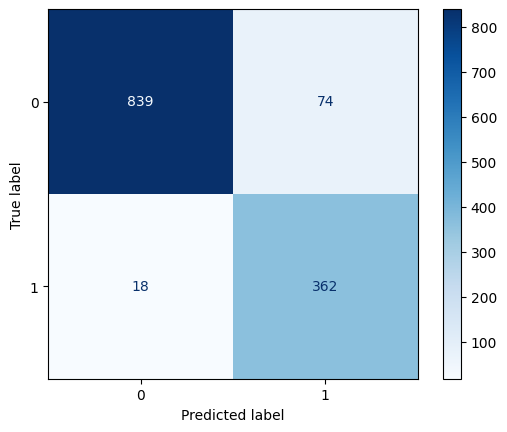


 ------------- 

CONFUSION MATRIX - WITHOUT STOP WORDS


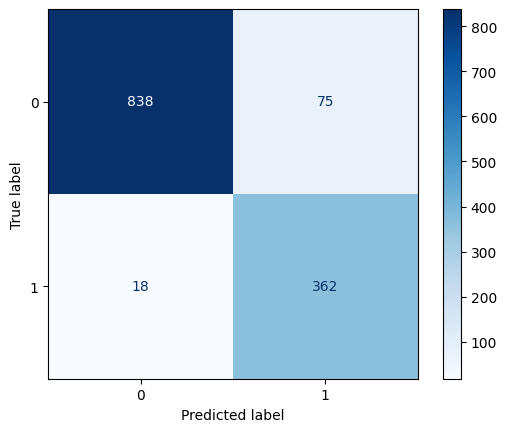


 ------------- 

CONFUSION MATRIX - CLUSTERING


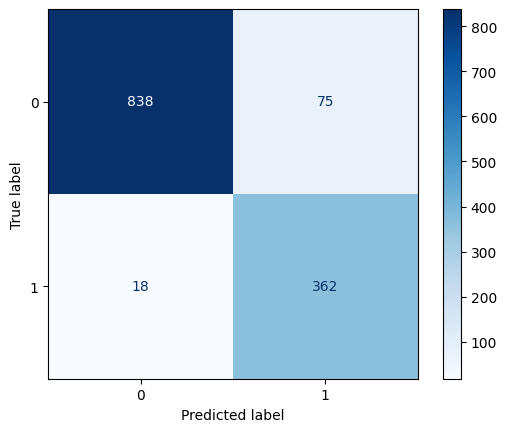

In [110]:
print("CONFUSION MATRIX - WITH STOP WORDS")
cm.plot(cmap='Blues', values_format='d')
plt.show()
print("\n ------------- \n")
print("CONFUSION MATRIX - WITHOUT STOP WORDS")
cm_without_stop_words.plot(cmap='Blues', values_format='d')
plt.show()
print("\n ------------- \n")
print("CONFUSION MATRIX - CLUSTERING")
cm_with_cluster.plot(cmap='Blues', values_format='d')
plt.show()

*Plot the metrics of each model*

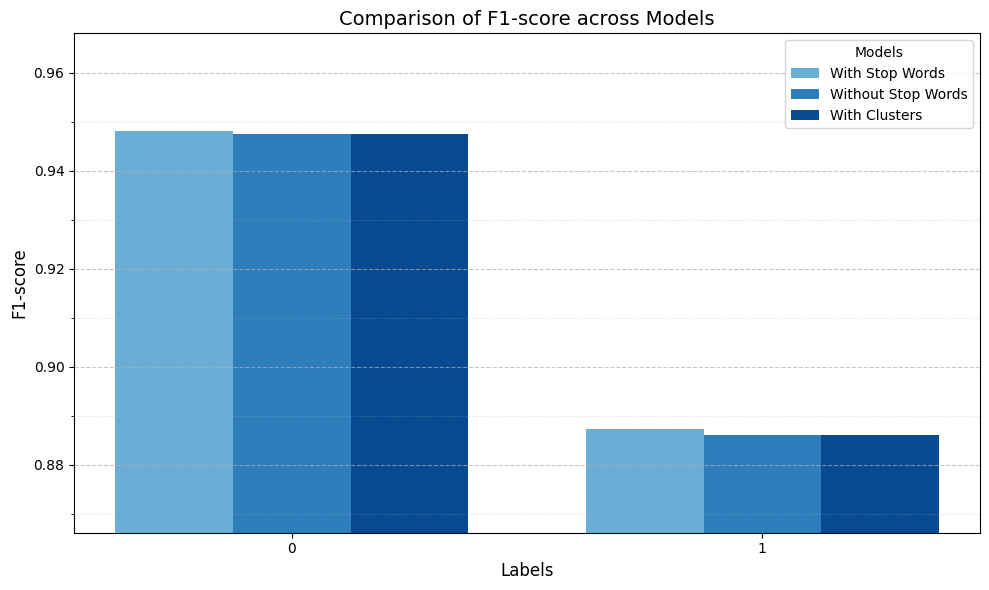

In [111]:
raw_report = classification_report(y_test, y_pred, output_dict=True)
no_stop_words_report = classification_report(y_test_without_stop_words, y_pred_without_stop_words, output_dict=True)
clusters_report = classification_report(y_test_with_cluster, y_pred_with_cluster, output_dict=True)

models = ['With Stop Words', 'Without Stop Words', 'With Clusters']
metric = 'f1-score'
classes = list(raw_report.keys())[:-3]  # Get all class labels except 'accuracy', etc.

# Prepare data for visualization
data = []
for report in [raw_report, no_stop_words_report, clusters_report]:
    data.append([report[class_name][metric] for class_name in classes])

import matplotlib.cm as cm
colors = cm.Blues(np.linspace(0.5, 0.9, len(models)))

x = np.arange(len(classes))  # Positions for classes on x-axis
width = 0.25  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each model
for i, (model_data, color) in enumerate(zip(data, colors)):
    ax.bar(x + i * width, model_data, width, label=models[i], color=color)

# Add titles and labels
ax.set_title(f'Comparison of {metric.capitalize()} across Models', fontsize=14)
ax.set_xlabel('Labels', fontsize=12)
ax.set_ylabel(f'{metric.capitalize()}', fontsize=12)
ax.set_xticks(x + width)  # Adjust for grouped bars
ax.set_xticklabels(classes, fontsize=10)

# Focus on a narrower range of y-axis
min_value = min([min(model_data) for model_data in data])
max_value = max([max(model_data) for model_data in data])
ax.set_ylim(min_value - 0.02, max_value + 0.02)

# Add detailed y-axis ticks
ax.yaxis.set_major_locator(plt.MultipleLocator(0.02))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.01))
ax.yaxis.grid(True, which='major', linestyle='--', alpha=0.7)
ax.yaxis.grid(True, which='minor', linestyle=':', alpha=0.4)

# Add legend
ax.legend(title='Models', fontsize=10)

plt.tight_layout()
plt.show()

**Train the model with only 'provenance'**

In [112]:
# Retrain with only 'Clusters' as feature
df_only_cluster = df_with_cluster.copy()
for feature in df_only_cluster.keys():
  if feature != 'Cluster' and feature != 'Prediction':
    df_only_cluster.drop([feature], axis=1, inplace=True)

In [113]:
print(df_only_cluster.head(5))

   Prediction  Cluster
0           0        0
1           0        1
2           0        0
3           0        0
4           0        0


RESULTS - WITH ONLY CLUSTER AS FEATURE
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       913
           1       0.48      0.30      0.37       380

    accuracy                           0.70      1293
   macro avg       0.62      0.58      0.59      1293
weighted avg       0.67      0.70      0.68      1293



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


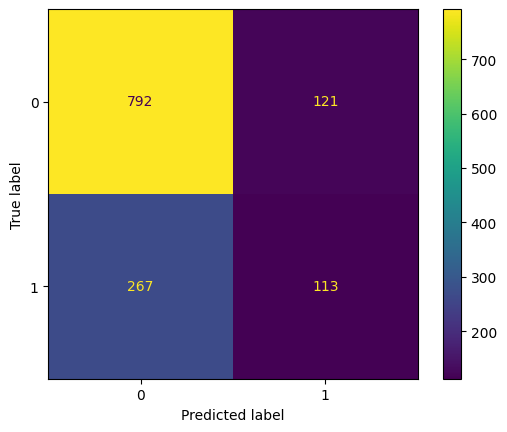

In [114]:
X_only_cluster = df_only_cluster.iloc[:, df_only_cluster.columns != "Prediction"]
y_only_cluster = df_only_cluster.iloc[:, df_only_cluster.columns == "Prediction"]

X_only_cluster = scaler.fit_transform(X_only_cluster)

from sklearn.model_selection import train_test_split
X_train_only_cluster, X_test_only_cluster, y_train_only_cluster, y_test_only_cluster = train_test_split(X_only_cluster, y_only_cluster, test_size=0.25, random_state=42)

from sklearn.naive_bayes import GaussianNB
nbc_sk_only_cluster = GaussianNB()
nbc_sk_only_cluster.fit(X_train_only_cluster, y_train_only_cluster)
y_pred_only_cluster = nbc_sk_only_cluster.predict(X_test_only_cluster)

from sklearn.metrics import precision_recall_fscore_support
_, recall_only_cluster, fscore_only_cluster, _ = precision_recall_fscore_support(y_test_only_cluster, y_pred_only_cluster, average='macro')

from sklearn.metrics import ConfusionMatrixDisplay
cm_only_cluster = ConfusionMatrixDisplay.from_estimator(nbc_sk_only_cluster, X_test_only_cluster, y_test_only_cluster)

print("RESULTS - WITH ONLY CLUSTER AS FEATURE")
print(classification_report(y_test_only_cluster, y_pred_only_cluster))

*Treat as spam an email if it comes from a spam domain or it contains a set of terms that are referrable to spam, so do an OR between the values predicted by the model trained without stop words and the model trained with only one feature (clusters)*

In [115]:
final_prediction = y_test_without_stop_words.copy()
final_prediction['Prediction'] = -1
print(final_prediction.head(5))

for i in range(len(y_pred_without_stop_words)):
  if y_pred_without_stop_words[i] == 1 or y_pred_only_cluster[i] == 1:
    final_prediction.iloc[i,0] = 1
  else:
    final_prediction.iloc[i,0] = 0

print(final_prediction.head(5))

      Prediction
1566          -1
1988          -1
1235          -1
3276          -1
3438          -1
      Prediction
1566           0
1988           0
1235           1
3276           0
3438           0


In [117]:
from sklearn.metrics import f1_score
final_f1 = f1_score(final_prediction, y_test, average='macro')
print("Final F1-score: " + str(final_f1))

Final F1-score: 0.8348347922128863
